<a href="https://colab.research.google.com/github/girlwholoved/Task2-HeartDiseaseDataset/blob/main/HDD_Irma_Nurmalia_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DETERMINASI MODEL MACHINE LEARNING**

Pada assignment ini, saya menggunakan dataset [Health Case Study](https://drive.google.com/file/d/1bT3_lIwUoNIXd4S-E8J4L2IDJlrEjMyl/view?usp=sharing). Berdasarkan dataset tersebut, modelling yang tepat adalah **Supervised Learning** dengan teknik **Classification**. Pada dataset tersebut, target dari analisis sudah ditentukan, yakni apakah pasien memiliki penyakit jantung atau tidak yang terdapat pada kolom "**target**". Pemilihan teknik Classification lebih tepat dibandingkan Regression sebab output dari dataset ini dibagi ke dalam dua kelas/kategori, yakni 0 = no dan 1 = disease dan bukan suatu nilai yang kontinu.

## INSTALLATION AND IMPORTING

In [ ]:
!pip install catboost

In [ ]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier, Pool, cv

# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/#MSIB/Startup Campus/data set - SC/heart.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## DATA PREPARATION


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

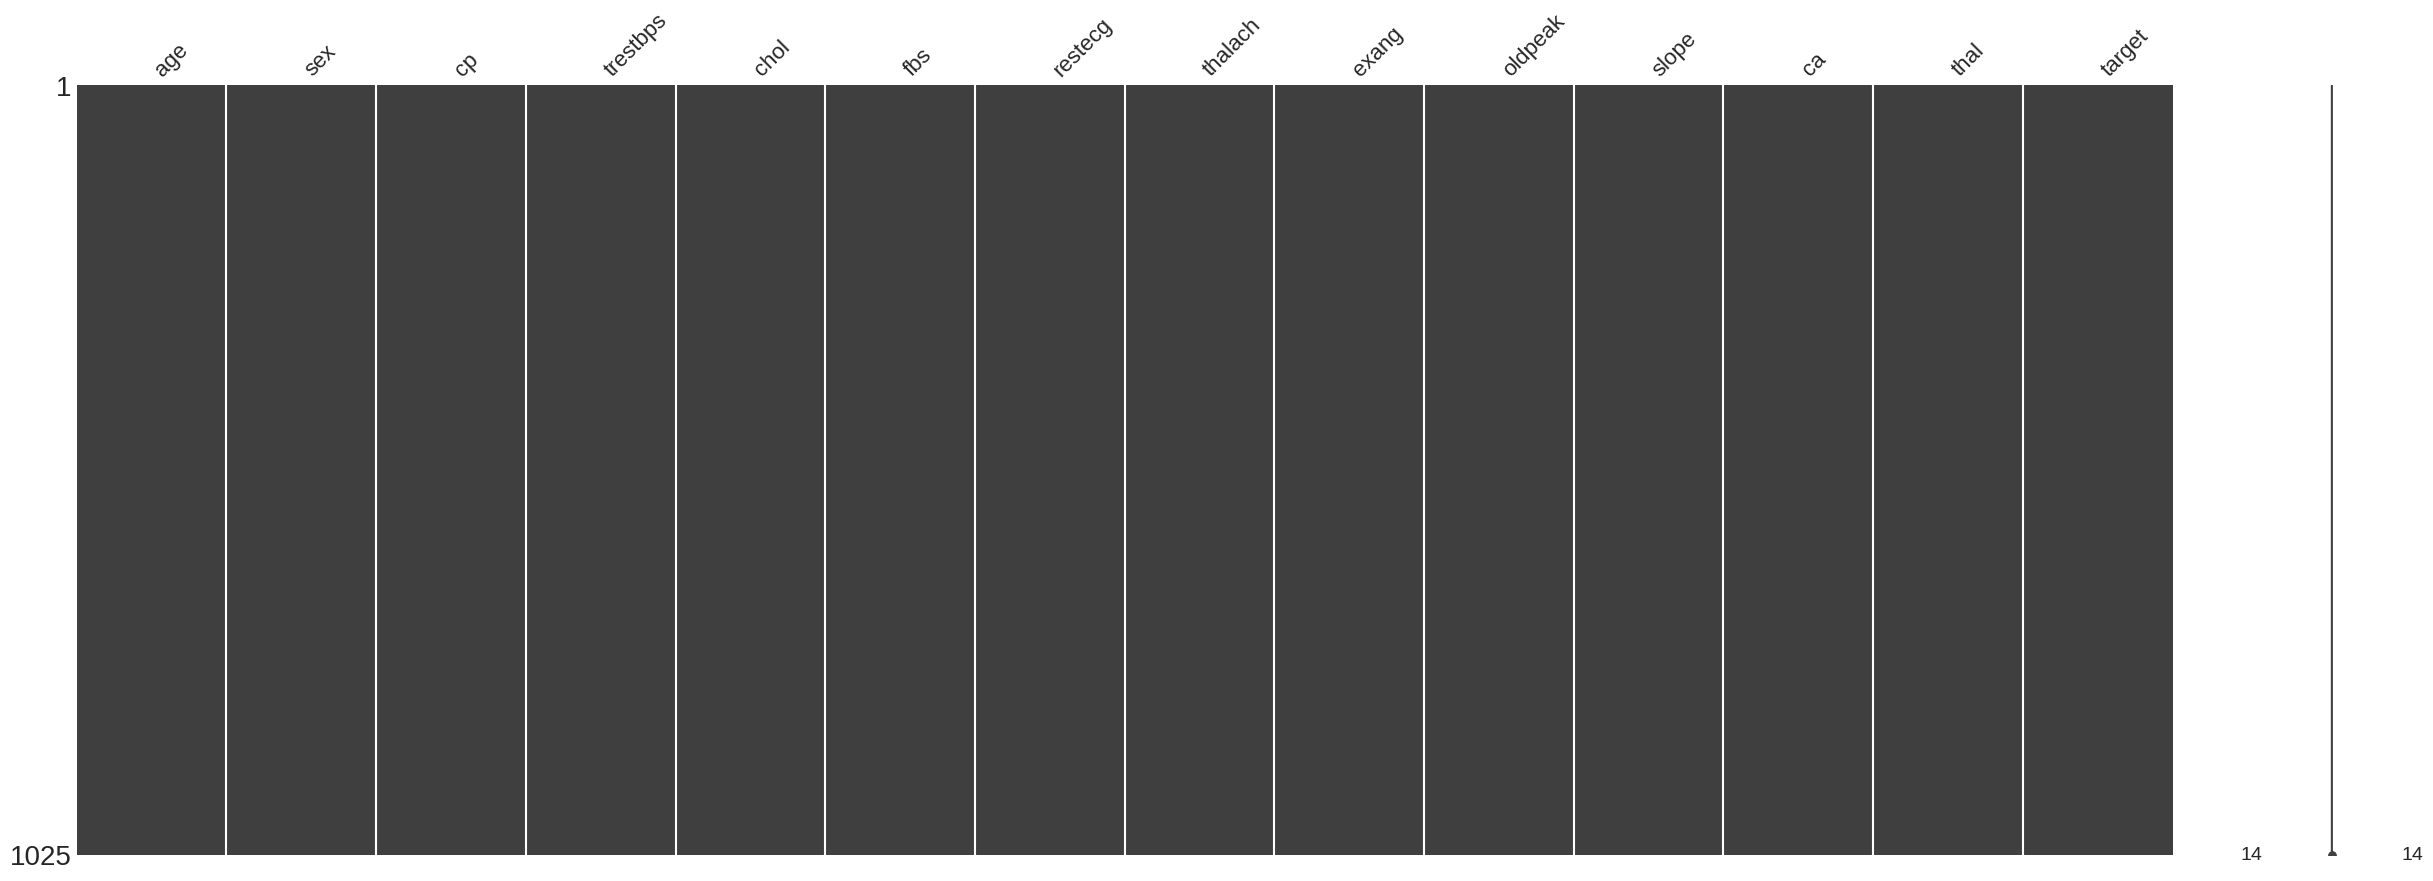

In [ ]:
# Plot graphic of missing values
missingno.matrix(data, figsize = (30,10))

In [ ]:
# memeriksa data duplikat
duplikat = data.duplicated()
duplikat

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
# hapus data duplikat
df = data.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
# memeriksa data duplikat
duplikat = df.duplicated()
duplikat

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool

## SUPERVISED LEARNING "CLASSIFICATION TECHNIQUE"

In [ ]:
# Assuming your target column is named 'target'
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [ ]:
# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# test_size = 0,25 --> 20:80 (data_train:data_testing)
# random_test = parameter untuk mengontrol RANDOMNESS --> agar pembagian data tetap

In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,44,1,1,130,219,0,0,188,0,0.0,2,0,2
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1
389,63,1,3,145,233,1,0,150,0,2.3,0,0,1
66,53,1,2,130,197,1,0,152,0,1.2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,63,0,2,135,252,0,0,172,0,0.0,2,0,2
438,47,1,2,130,253,0,1,179,0,0.0,2,0,2
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2
377,64,0,0,130,303,0,1,122,0,2.0,1,2,2


In [ ]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
23     1
438    1
60     1
377    1
140    0
Name: target, Length: 76, dtype: int64

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

## LEARNING CURVE

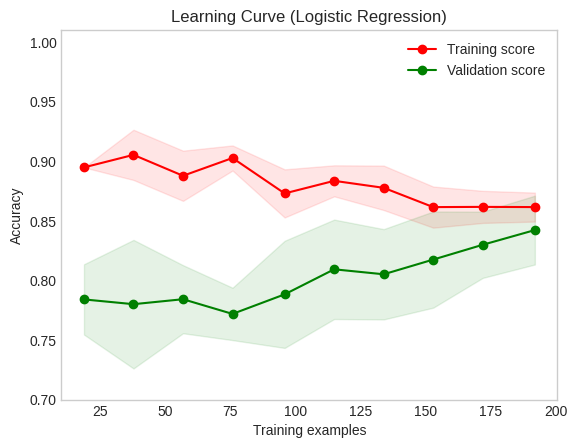

In [ ]:
# Memisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk menggambar kurva pembelajaran
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Membuat model
estimator = LogisticRegression()

# Menggambar kurva pembelajaran
plot_learning_curve(estimator, "Learning Curve (Logistic Regression)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


Grafik Learning Curves yang dihasilkan termasuk **Underfit** yang ditandai dengan menurunnya kurva akurasi train data seiring bertambahnya jumlah data. Hal tersebut dapat disebabkan kurangnya sample data atau algoritma yang terlalu sederhana untuk permasalahan yang kompleks

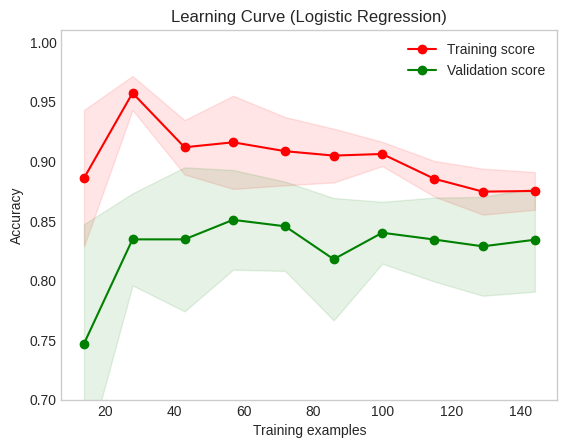

In [ ]:
# Memisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Fungsi untuk menggambar kurva pembelajaran
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Membuat model
estimator = LogisticRegression()

# Menggambar kurva pembelajaran
plot_learning_curve(estimator, "Learning Curve (Logistic Regression)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


Learning curve di atas menggunakan perbandingan train-test data 40:60 namun grafik yang dihasilkan masih sama. Hal itu menandakan bahwa kurangnya sample data yang di-mention sebelumnya bukan penyebab kurva yang dihasilkan **Underfit**

## MODEL EVALUATION "CONFUSION MATRIX"

---



In [ ]:
# Buat nyari tahu perbedaan nilai 'Outcome' pada y_test dan evaluasi matrix
#            singkatnya metode mana yg hasilnya bagus --> nilai actual sama confusion matrix salahnya sedikit
#            kalo dalam contoh ini yg better RF = RANDOM FOREST dan XGBOOST

actual = y_test  # Actual target values
# Create confusion matrices
knn_cm = confusion_matrix(actual, knn_pred)
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)
xgb_cm = confusion_matrix(actual, xgb_pred)

# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
knn_cm_df = confusion_matrix_to_dataframe(knn_cm)
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)
xgb_cm_df = confusion_matrix_to_dataframe(xgb_cm)

In [ ]:
knn_cm_df

Predicted,0,1
Actual,,
0,17,23
1,5,31


In [ ]:
dt_cm_df

Predicted,0,1
Actual,,
0,30,10
1,11,25


In [ ]:
rf_cm_df

Predicted,0,1
Actual,,
0,30,10
1,4,32


In [ ]:
xgb_cm_df

Predicted,0,1
Actual,,
0,29,11
1,5,31


Hasil di atas menunjukkan bahwa teknik **Random Forest** memiliki akurasi paling baik dibandingkan teknik lain, dimana pada teknik Random Forest mampu mengkategorikan TP sebanyak 30 dan TN sebanyak 32 sesuai nilai aktualnya

In [ ]:
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1


# Evaluate KNN
knn_cm, knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate(y_test, knn_pred)

# Evaluate Decision Tree
dt_cm, dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate(y_test, dt_pred)

# Evaluate Random Forest
rf_cm, rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate(y_test, rf_pred)

# Evaluate XGBoost
xgb_cm, xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate(y_test, xgb_pred)

In [ ]:
knn_f1

0.6149405772495755

In [ ]:
dt_f1

0.7234439777063943

In [ ]:
rf_f1

0.8154064996170259

In [ ]:
xgb_f1

0.7890359995623154

Hasil evalusi model dengan f1 score juga menunjukkan hasil yang sama, Random Forest memiliki tingkat akurasi model paling tinggi dengan score 0.8154 atau 81.54%

## SAMPLING METHODE

### CROSS VALIDATION

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
clf = DecisionTreeClassifier(random_state=0)

X = df.drop('target', axis=1)
y = df['target']

cv_score = cross_val_score(clf, X, y, cv=10)
print("Cross Validation Score")
print(cv_score)

Cross Validation Score
[0.80645161 0.70967742 0.8        0.66666667 0.86666667 0.83333333
 0.86666667 0.7        0.76666667 0.83333333]


In [ ]:
# Predict using cross validation
y_pred = cross_val_score(clf, X, y, cv=5)
print(y_pred)

[0.78688525 0.75409836 0.85       0.71666667 0.75      ]


In [ ]:
# Predict using cross validation
y_pred = cross_val_score(clf, X, y, cv=7)
print(y_pred)

[0.77272727 0.72093023 0.81395349 0.74418605 0.72093023 0.72093023
 0.79069767]


Berdasarkan hasil Cross Validation, validasi paling baik terdapat pada lipatan ke-3 atau cv = 3 dengan score akurasi >=80%.

### BOOTSTRAPING

In [ ]:
# Implement Bootstrapping
n_bootstraps = 10
bootstrapped_scores = []

for _ in range(n_bootstraps):
    bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    clf.fit(X_bootstrap, y_bootstrap)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bootstrapped_scores.append(acc)


# Print the results
print("Bootstrapped Scores:", bootstrapped_scores)
print("Average Bootstrapped Score:", np.mean(bootstrapped_scores))


Bootstrapped Scores: [0.9463414634146341, 0.9414634146341463, 0.9609756097560975, 0.9365853658536586, 0.9365853658536586, 0.9414634146341463, 0.9121951219512195, 0.975609756097561, 0.9658536585365853, 0.9170731707317074]
Average Bootstrapped Score: 0.9434146341463414


## MODEL OPTIMISATION

### HYPERPARAMETER TUNING DECISION TREE

In [ ]:
# Memisahkan fitur dan target
X = data.drop('target', axis=1)
y = data['target']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan model Decision Tree
clf = DecisionTreeClassifier(random_state=0)

# Tentukan grid parameter yang akan diuji
param_grid = {
    'max_depth': [2, 4, 6, 8, 10]
}

# Inisialisasi Grid Search dengan model Decision Tree dan grid parameter
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Lakukan pencarian hyperparameter terbaik menggunakan data latih
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik yang ditemukan
print("Hyperparameter terbaik:")
print(grid_search.best_params_)

# Evaluasi model dengan hyperparameter terbaik menggunakan data uji
best_clf = grid_search.best_estimator_
score = best_clf.score(X_test, y_test)
print("Score model dengan hyperparameter terbaik:")
print(score)


Hyperparameter terbaik:
{'max_depth': 10}
Score model dengan hyperparameter terbaik:
0.9853658536585366


In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluasi model dengan max depth random
clf_max_depth = DecisionTreeClassifier(max_depth=5, random_state=0)
clf_max_depth.fit(X_train, y_train, sample_weight=None, check_input=True)
score_random_depth = clf_max_depth.score(X_test, y_test)
print("Score model dengan hyperparameter random")
print(score_random_depth)

# Evaluasi model dengan hyperparameter terbaik menggunakan data uji
clf_max_depth = DecisionTreeClassifier(max_depth=10, random_state=0)
clf_max_depth.fit(X_train, y_train, sample_weight=None, check_input=True)
score_max_depth = clf_max_depth.score(X_test, y_test)
print("Score model dengan hyperparameter terbaik:")
print(score_max_depth)


Score model dengan hyperparameter random
0.8439024390243902
Score model dengan hyperparameter terbaik:
0.9853658536585366


### ENSEMBLE MODEL

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Memisahkan fitur dan target
X = data.drop('target', axis=1)
y = data['target']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("Decision Tree Score = %f" % scores.mean())

clf_forest = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores_forest = cross_val_score(clf_forest, X, y, cv=5)
print("Random Forest Score = %f" % scores_forest.mean())

clf_ext = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores_ext = cross_val_score(clf_ext, X, y, cv=5)
print("Extra Tree Score = %f" % scores_ext.mean())

Decision Tree Score = 0.982300
Random Forest Score = 0.999700
Extra Tree Score = 1.000000
